## 线性判别分析(LDA)
经典的线性学习方法。思想：将样例投影到直线上，使得同样例的投影点尽可能近，不同样例的投影点尽可能远。即“投影后类内方差最小，类间方差最大”。

### 瑞利商（Rayleigh quotient）与广义瑞利商（genralized Rayleigh quotient）
瑞利商是指这样的函数$R(A,x)$:

$R(A,x) = \frac{x^HAx}{x^Hx}$

其中$x$为非零向量，而A为$n\times n$的Hermitan矩阵。所谓的Hermitan矩阵就是满足共轭转置矩阵和自己相等的矩阵，即$A^H=A$。
如果我们的矩阵A是实矩阵，则满足$A^T=A$的矩阵即为Hermitan矩阵。

瑞利商R(A,x)有一个非常重要的性质，即它的最大值等于矩阵A最大的特征值，而最小值等于矩阵A的最小的特征值，也就是满足

$\lambda_{min} \leq \frac{x^HAx}{x^Hx} \leq \lambda_{max}$

当向量x是标准正交基时，即满足$x^Hx=1$时，瑞利商退化为：$R(A,x)=x^HAx$，这个形式在谱聚类和PCA中都有出现。

广义瑞利商是指这样的函数$R(A,B,x)$:

$R(A,x) = \frac{x^HAx}{x^HBx}$

其中x为非零向量，而A,B为$n×n$的Hermitan矩阵。B为正定矩阵。它的最大值和最小值是什么呢？
其实我们只要通过将其通过标准化就可以转化为瑞利商的格式。我们令$x=B^{-1/2}x'$,则分母转化为：

$x^HBx = x'^H(B^{-1/2})^HBB^{-1/2}x' = x'^HB^{-1/2}BB^{-1/2}x' = x'^Hx'$

分子则转化为：

$x^HAx =  x'^HB^{-1/2}AB^{-1/2}x'$

此时，公式转化为：

$R(A,B,x') = \frac{x'^HB^{-1/2}AB^{-1/2}x'}{x'^Hx'}$

可以很快的知道，$R(A,B,x′)$的最大值为矩阵$B^{-1/2}AB^{-1/2}$的最大特征值，或者说矩阵$B^{-1/2}A$的最大特征值，而最小值为矩阵$B^{-1/2}A$的最小特征值。
### 二类LDA原理
假设数据集为$D=\{(x_1,y_1), (x_2,y_2), ...,((x_m,y_m))\}$，其中样本$x_i$为n维向量，$y_i \in \{0,1\}$,定义$N_j(j=0,1)$为第j类样本的数，$X_j(j=0,1)$为第j类样本的集合，$\mu_j(j=0,1)$为第j类样本的均值向量，$\Sigma_j(j=0,1)$为第j类样本的协方差矩阵。

$\mu_j = \frac{1}{N_j}\sum\limits_{x \in X_j}x\;\;(j=0,1)$

$\Sigma_j = \sum\limits_{x \in X_j}(x-\mu_j)(x-\mu_j)^T\;\;(j=0,1)$

由于是两类数据，因此我们只需要将数据投影到一条直线上即可。假设我们的投影直线是向量$w$,则对任意一个样本本$x_i$,它在直线w的投影为$w^Tx_i$,对于我们的两个类别的中心点$μ_0,μ_1$,在在直线$w$的投影为$w^Tμ_0$和$w^Tμ_1$。由于LDA需要让不同类别的数据的类别中心之间的距离尽可能的大，也就是我们要最大化$||w^Tμ_0−w^Tμ_1||^2_2$,同时我们希望同一种类别数据的投影点尽可能的接近，也就是要同类样本投影点的协方差$w^TΣ_0w$和$w^TΣ_1w$尽可能的小，即最小化$w^TΣ_0w+w^TΣ_1w$。综上所述，我们的优化目标为：

$\underbrace{arg\;max}_w\;\;J(w) = \frac{||w^T\mu_0-w^T\mu_1||_2^2}{w^T\Sigma_0w+w^T\Sigma_1w} = \frac{w^T(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw}{w^T(\Sigma_0+\Sigma_1)w}$

一般，定义类内散度矩阵$S_w$为：

$S_w = \Sigma_0 + \Sigma_1 = \sum\limits_{x \in X_0}(x-\mu_0)(x-\mu_0)^T + \sum\limits_{x \in X_1}(x-\mu_1)(x-\mu_1)^T$

类间散度矩阵$S_b$:

$S_b = (\mu_0-\mu_1)(\mu_0-\mu_1)^T$

则，得到优化目标为:

$\underbrace{arg\;max}_w\;\;J(w) = \frac{w^TS_bw}{w^TS_ww}$

这就是我们的广义瑞利商！利用广义瑞利商的性质，知道$J(w′)$最大值为矩阵$S^{−\frac{1}{2}}_wS_bS^{−\frac{1}{2}}_w$的最大特征值，而对应的$w′$为$S^{−\frac{1}{2}}_wS_bS^{−\frac{1}{2}}_w$的最大特征值对应的特征向量! 而$S^{−1}_wS_b$的特征值和$S^{−1/2}_wS_bS^{−1/2}_w$的特征值相同,$S^{−1}_wS_b$的特征向量$w$和$S^{−1/2}_wS_bS^{−1/2}_w$的特征向量$w′$满足$w=S^{−1/2}_ww′$的关系! 

注意到对于二类的时候，$S_bw$的方向恒平行于$μ_0−μ_1$,不妨令$S_bw=λ(μ_0−μ_1)$，将其带入：$(S^{−1}_wS_b)w=λw$，可以得到$w=S^{−1}_w(μ_0−μ_1)$， 也就是说我们只要求出原始二类样本的均值和方差就可以确定最佳的投影方向w了。


现在我们对LDA降维的流程做一个总结。

　　　　输入：数据集$D={(x1,y1),(x2,y2),...,((xm,ym))}$,其中任意样本xi为n维向量，$yi∈{C1,C2,...,Ck}$，降维到的维度d。

　　　　输出：降维后的样本集$D′$

　　　　1) 计算类内散度矩阵$S_w$

　　　　2) 计算类间散度矩阵$S_b$

　　　　3) 计算矩阵$S^{−1}_wS_b$

　　　　4）计算$S^{−1}_wS_b$的最大的d个特征值和对应的d个特征向量$(w1,w2,...wd)$,得到投影矩阵$WW$

　　　　5) 对样本集中的每一个样本特征xi,转化为新的样本$z_i=W^Tx_i$
    
　　　　6) 得到输出样本集$D′={(z1,y1),(z2,y2),...,((zm,ym))}$


In [3]:
# 导入相应的包
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [12]:
# 以红酒数据为例 红酒数据有3个类别，每个类别有13个特征
# load data
df_wine = pd.read_csv("wine/wine.data",header=None)

# train:data = 7:3
x,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,stratify=y, random_state=0)

# 标准化单位方差
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
x_train_std

array([[ 0.7123,  2.2205, -0.1303, ..., -0.2002, -0.8216, -0.6295],
       [ 0.8823, -0.7046,  1.1753, ...,  1.3398,  0.5493,  1.4757],
       [ 0.8459, -0.7302,  1.1753, ...,  1.0681,  0.1308,  1.6293],
       ...,
       [ 1.028 ,  2.2975, -0.5779, ..., -1.6949, -1.8607, -1.0443],
       [-1.3038, -1.0809, -0.3168, ...,  0.1622,  0.7369,  0.4031],
       [-0.4051,  1.2968,  0.0563, ...,  1.0681,  0.7369, -0.8968]])

In [13]:
# 计算均值向量
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(x_train_std[y_train==label],axis=0))
mean_vecs

[array([ 0.9066, -0.3497,  0.3201, -0.7189,  0.5056,  0.8807,  0.9589,
        -0.5516,  0.5416,  0.2338,  0.5897,  0.6563,  1.2075]),
 array([-0.8749, -0.2848, -0.3735,  0.3157, -0.3848, -0.0433,  0.0635,
        -0.0946,  0.0703, -0.8286,  0.3144,  0.3608, -0.7253]),
 array([ 0.1992,  0.866 ,  0.1682,  0.4148, -0.0451, -1.0286, -1.2876,
         0.8287, -0.7795,  0.9649, -1.209 , -1.3622, -0.4013])]

In [15]:
# 计算类内散度矩阵
k = 13
sw = np.zeros((k,k))
for label, mv in zip(range(1,4),mean_vecs):
    si = np.zeros((k,k))
    si = np.cov(x_train_std[y_train==label].T)
    sw+=si
sw

array([[ 1.2448,  0.0967, -0.1276, -0.1105, -0.0726,  0.2374,  0.0753,
         0.0231,  0.1102,  0.4261,  0.1411, -0.0155,  0.1224],
       [ 0.0967,  2.2666,  0.1168,  0.3517, -0.2622, -0.0467, -0.0186,
         0.2194,  0.0187, -0.3939, -0.4167,  0.0787, -0.2492],
       [-0.1276,  0.1168,  2.6024,  1.6442,  0.5364,  0.3947,  0.3191,
         0.4553, -0.0353,  0.06  ,  0.167 ,  0.1987, -0.0081],
       [-0.1105,  0.3517,  1.6442,  2.1604,  0.325 ,  0.1535,  0.1222,
         0.273 , -0.0824, -0.068 ,  0.0336,  0.2548, -0.1201],
       [-0.0726, -0.2622,  0.5364,  0.325 ,  2.4397,  0.2384,  0.1433,
        -0.5166,  0.2566,  0.1445,  0.1777, -0.0058,  0.2509],
       [ 0.2374, -0.0467,  0.3947,  0.1535,  0.2384,  1.352 ,  0.6416,
        -0.0781,  0.7644,  0.4392,  0.0177,  0.4359,  0.1554],
       [ 0.0753, -0.0186,  0.3191,  0.1222,  0.1433,  0.6416,  0.6968,
        -0.2588,  0.5765,  0.3851, -0.0408,  0.2525,  0.0748],
       [ 0.0231,  0.2194,  0.4553,  0.273 , -0.5166, -0.0781, 

多类LDA,类间散度矩阵:

$S_b = \sum\limits_{j=1}^{k}N_j(\mu_j-\mu)(\mu_j-\mu)^T$

优化目标函数：

$\underbrace{arg\;max}_W\;\;J(W) = \frac{\prod\limits_{diag}W^TS_bW}{\prod\limits_{diag}W^TS_wW}$

其中$\prod\limits_{diag}$为A的主对角线元素的乘积，$W$为$n×d$的矩阵。

J(W)优化过程可以转化为：$J(W) = \frac{\prod\limits_{i=1}^dw_i^TS_bw_i}{\prod\limits_{i=1}^dw_i^TS_ww_i} = \prod\limits_{i=1}^d\frac{w_i^TS_bw_i}{w_i^TS_ww_i}$

In [23]:
# 计算类间散度矩阵
mean_all = np.mean(x_train_std,axis =0)
sb = np.zeros((k,k))
for i,col_mv in enumerate(mean_vecs):
    n = x_train[y_train == i+1,:].shape[0]
    col_mv = col_mv.reshape(k,1)
    mean_all = mean_all.reshape(k,1)
    sb+=n*(col_mv- mean_all).dot((col_mv-mean_all).T)

In [27]:
# 广义特征值
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(sw).dot(sb))
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
eigen_pairs

[(349.61780890599397,
  array([-0.1481+0.j,  0.0908+0.j, -0.0168+0.j,  0.1484+0.j, -0.0163+0.j,
          0.1913+0.j, -0.7338+0.j, -0.075 +0.j,  0.0018+0.j,  0.294 +0.j,
         -0.0328+0.j, -0.3547+0.j, -0.3915+0.j])),
 (172.7615221897938,
  array([-0.4092+0.j, -0.1577+0.j, -0.3537+0.j,  0.3223+0.j, -0.0817+0.j,
          0.0842+0.j,  0.2823+0.j, -0.0102+0.j,  0.0907+0.j, -0.2152+0.j,
          0.2747+0.j, -0.0124+0.j, -0.5958+0.j])),
 (3.08428579371944e-14,
  array([ 0.1122+0.j, -0.4077+0.j,  0.0415+0.j,  0.2495+0.j, -0.0261+0.j,
          0.1469+0.j,  0.5775+0.j, -0.0377+0.j, -0.0458+0.j,  0.0895+0.j,
         -0.1417+0.j, -0.5463+0.j, -0.2674+0.j])),
 (2.842170943040401e-14,
  array([ 0.7517+0.j, -0.0834+0.j, -0.2406+0.j,  0.2515+0.j, -0.0586+0.j,
          0.1027+0.j,  0.0109+0.j, -0.025 +0.j,  0.0611+0.j, -0.0726+0.j,
          0.1757+0.j, -0.0943+0.j, -0.4933+0.j])),
 (2.38683065228439e-14,
  array([-0.5625+0.j    ,  0.3441+0.1058j,  0.2097+0.0049j, -0.2455-0.119j ,
         -0

[0.6692795600710418, 0.33072043992895805, 5.4408181446965336e-17, 3.103792820716207e-17, 3.103792820716207e-17, 1.2662094610372913e-17, 1.2662094610372913e-17, 1.0266016233719437e-17, -9.468098532987346e-18, -2.315922774551034e-17, -2.315922774551034e-17, -3.163758021123117e-17, -5.904302888955381e-17]


/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yel/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35782 mi

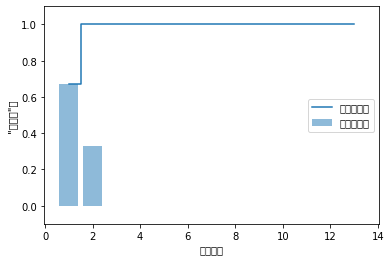

In [30]:
# 线性判别捕捉
# 从捕捉到的特征值发现，前两个可以占据大部分数据集特征了，接下来可视化表示更加直观地观察
# 线性判别捕捉，计算辨识力
tot = sum(eigen_vals.real)
discr = []
for i in sorted(eigen_vals.real, reverse=True):
    discr.append(i / tot)
print(discr)
cum_discr = np.cumsum(discr) # 计算累加方差
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='独立辨识力')
plt.step(range(1,14),cum_discr,where='mid',label='累加辨识力')
plt.ylabel('"辨识力"比')
plt.xlabel('线性判别')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()


In [31]:
# 数据投影降维
# 变换矩阵
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print(w)

[[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


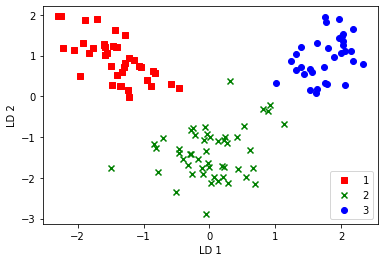

In [33]:
# 样本数据投影到低维空间
x_train_lda = x_train_std.dot(w)
colors = ['r', 'g', 'b']
marks = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, marks):
    plt.scatter(x_train_lda[y_train == l, 0],
x_train_lda[y_train == l, 1] * -1,
c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()